In [3]:
import os
import cv2
from hand_tracker import HandTracker
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
# 模型相关初始化
palm_model_path = ".\\models\\palm_detection.tflite"
landmark_model_path = ".\\models\\hand_landmark.tflite"
anchors_path = ".\\data\\anchors.csv" 
# box_shift determines 
from hand_tracker import HandTracker
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

hand tracker built ok


In [4]:
# 视频相关初始化
indir = 'D:\\jester\\data\\10179'
filelist = os.listdir(indir)
fps = 12 # 帧率
outpath = 'test.avi' # 视频输出位置
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
# firstpic = cv2.imread(path+'\\'+filelist[0])
# size = (firstpic.shape[1], firstpic.shape[0]) # 视频分辨率
size = (720, 720)

In [18]:
video = cv2.VideoWriter(filename=outpath, fourcc=fourcc, fps=fps, frameSize=size)
 
for item in filelist:
    item = indir + '\\' + item 
    img = cv2.imread(item)
    
    kp, box = detector(img)
    
    if kp is None:
        pass
    else:
        f,ax = plt.subplots(1,1, figsize=(10, 10))
        ax.imshow(img)
        ax.scatter(kp[:,0], kp[:,1])
        from matplotlib.lines import Line2D
        # 加线条
        for finger_index in range(5):
            start = finger_index * 4 + 1
            ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
            for k in range(start, start+3):
                ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))
        f.canvas.draw()
        data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
        data = data.reshape(f.canvas.get_width_height()[::-1] + (3,)) 
        video.write(data)

video.release() #释放

C:\Users\zys98\Anaconda3\envs\ht-1\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
C:\Users\zys98\Anaconda3\envs\ht-1\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


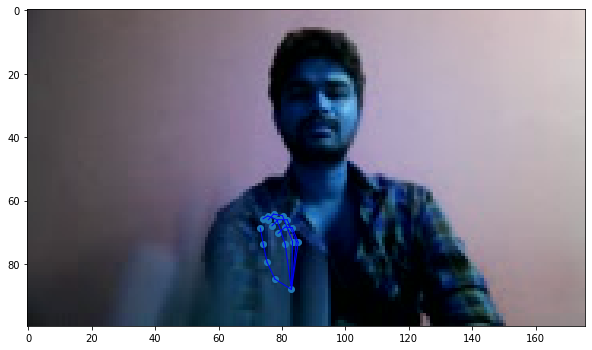

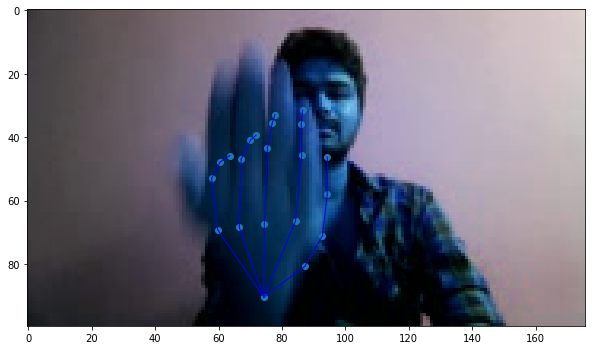

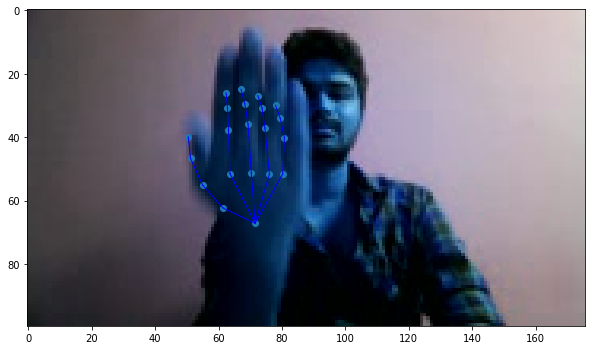

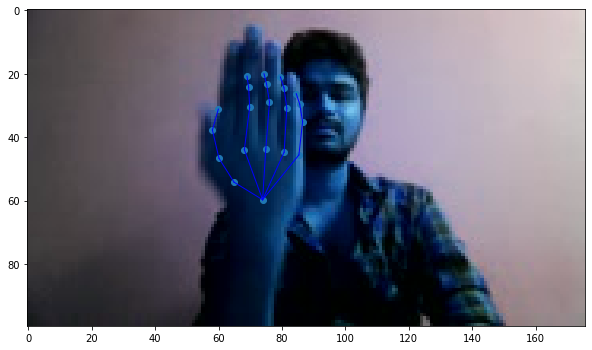

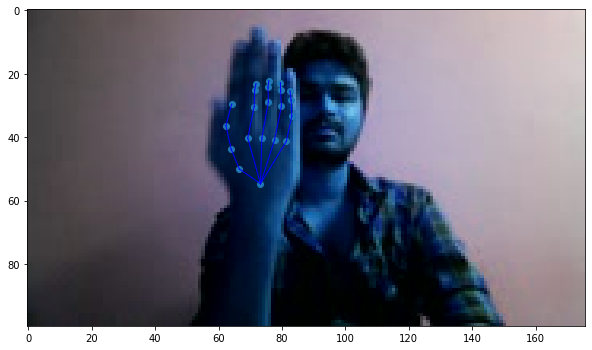

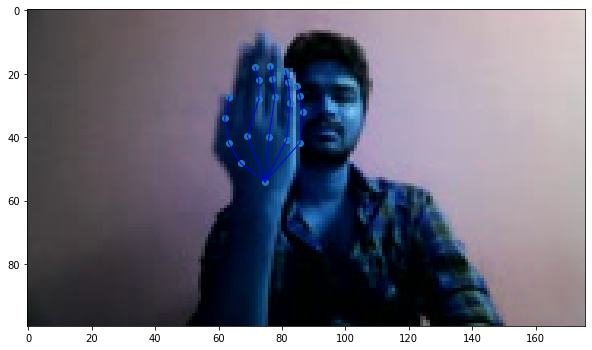

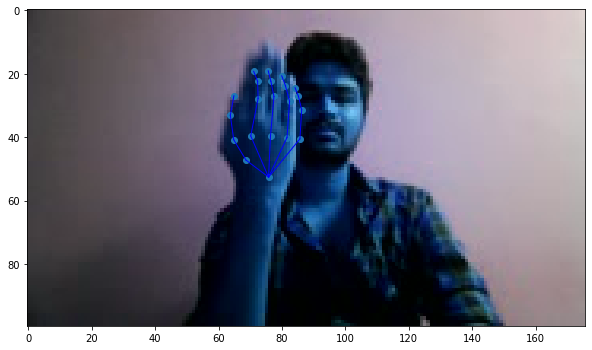

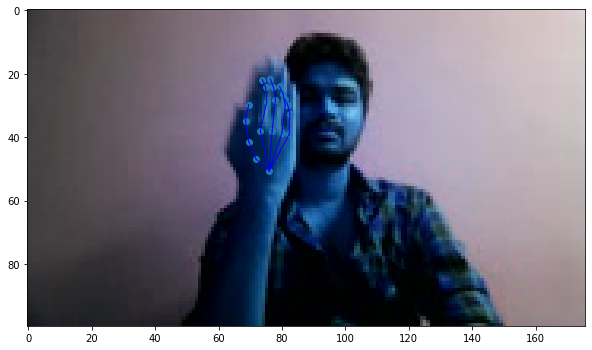

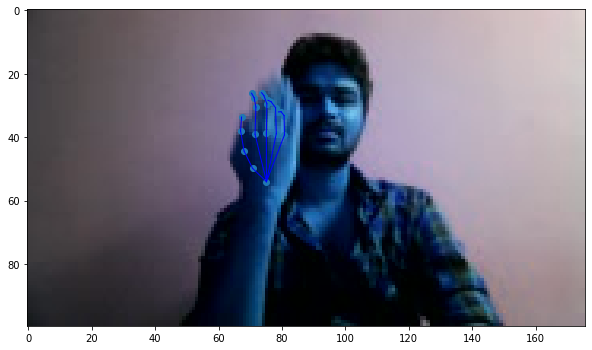

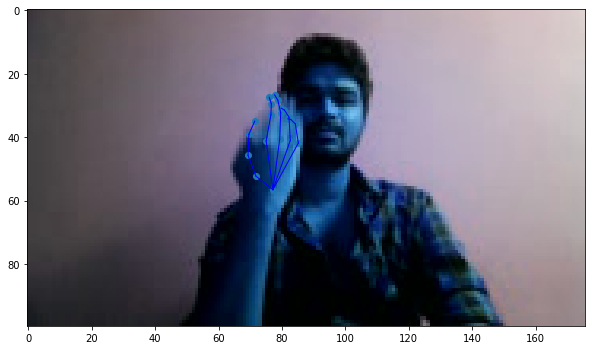

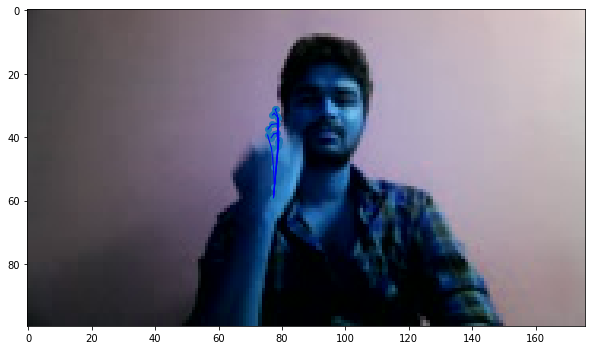

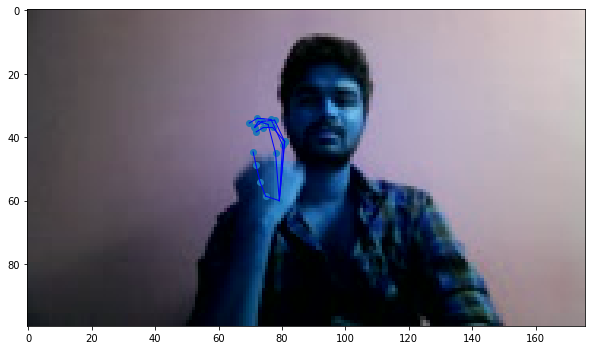

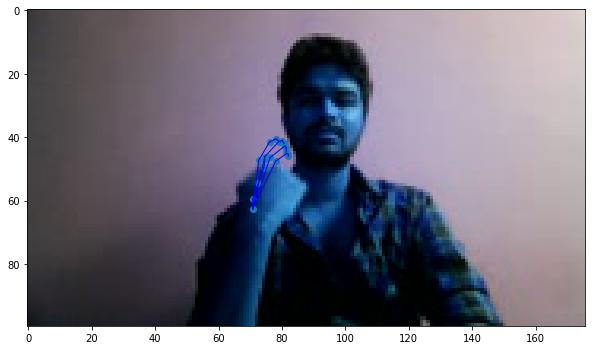

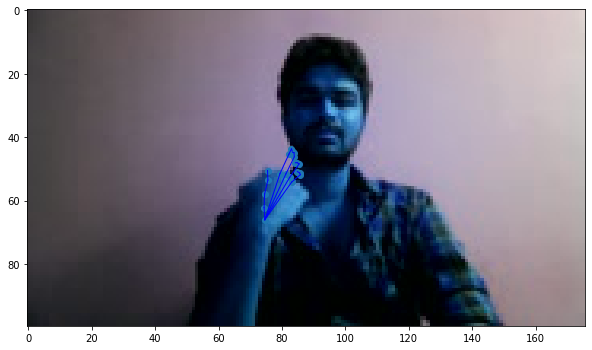

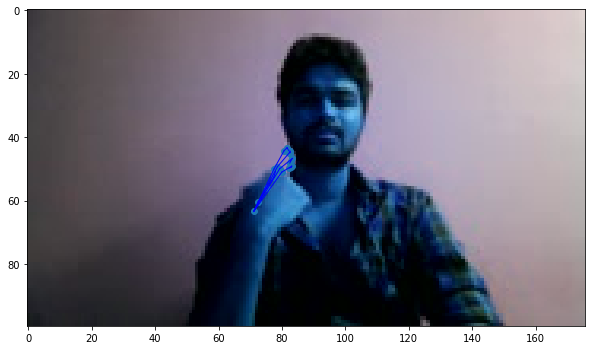

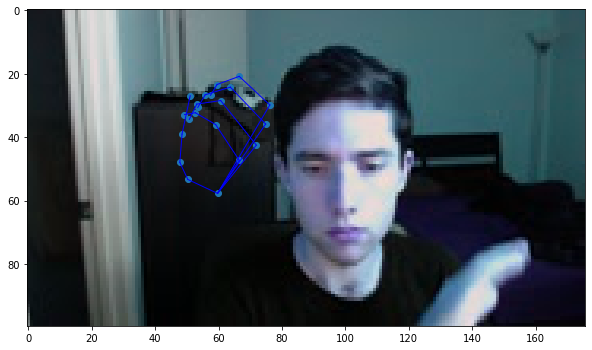

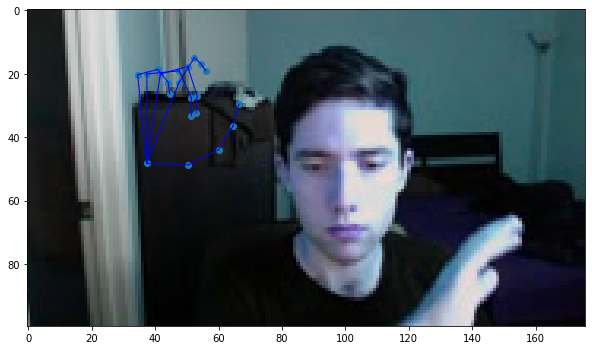

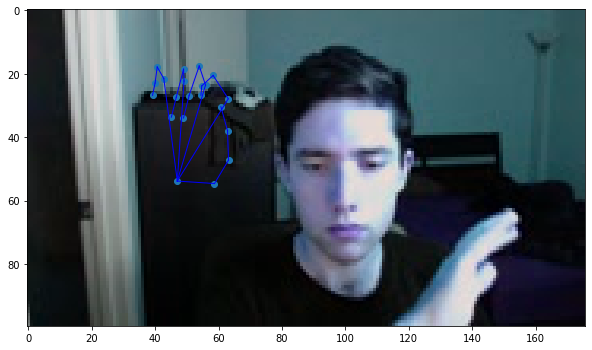

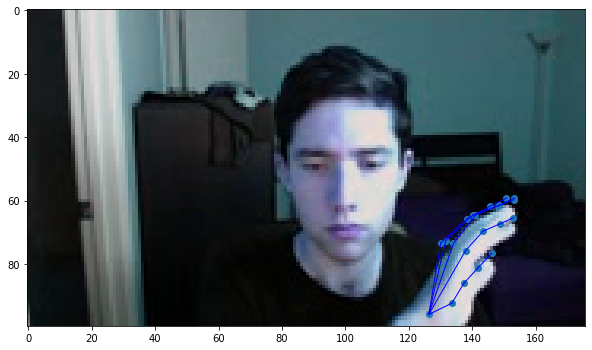

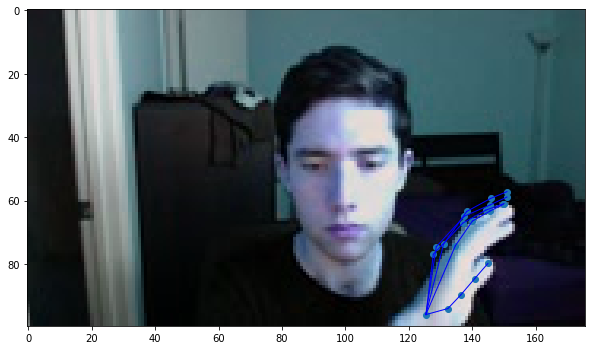

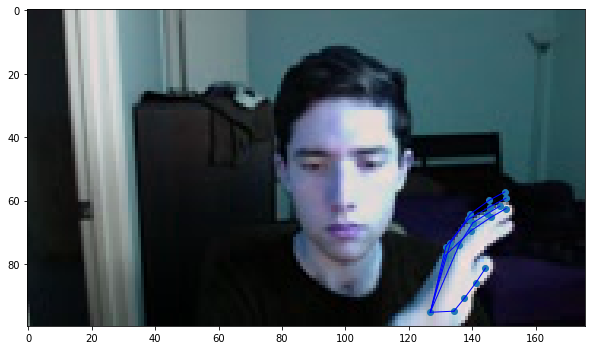

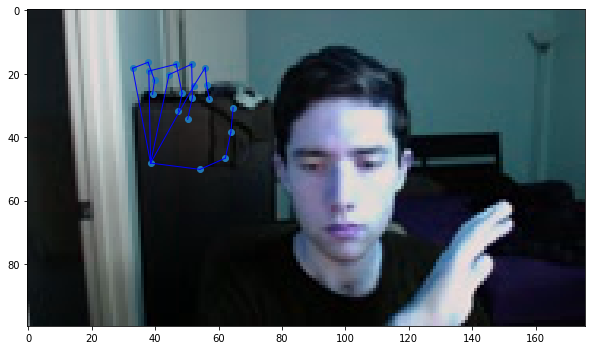

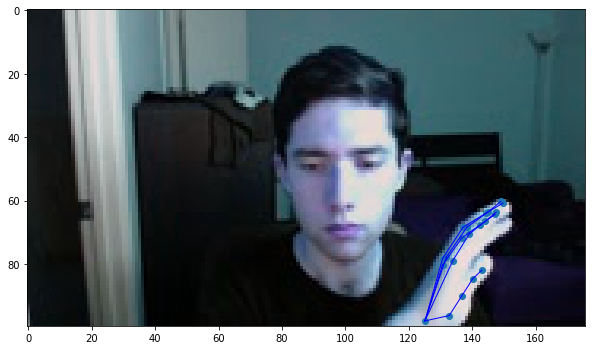

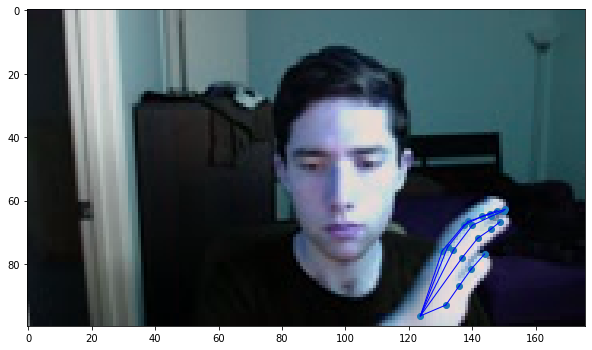

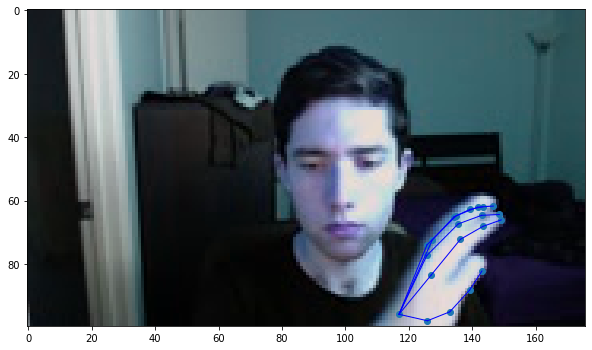

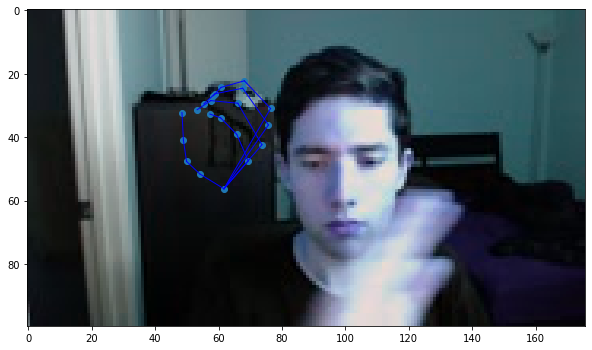

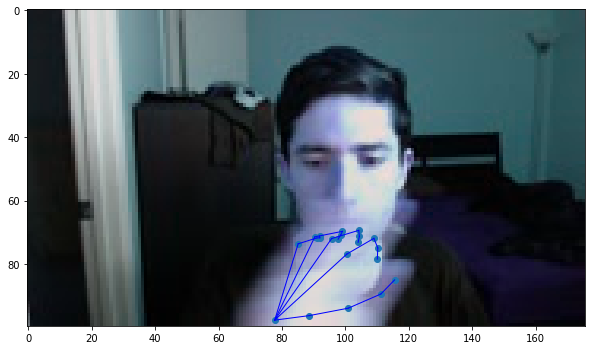

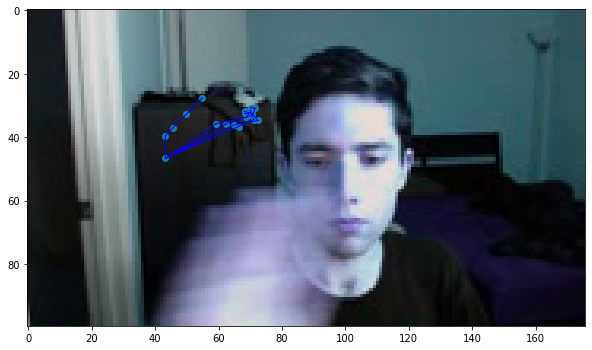

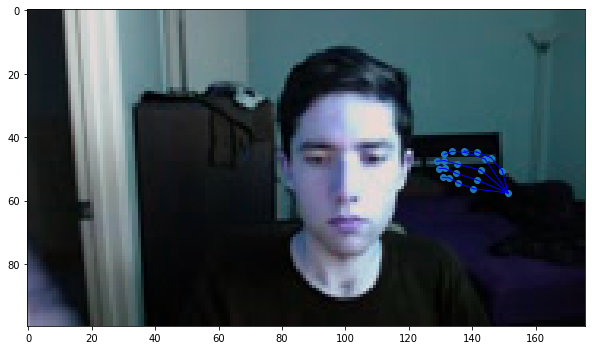

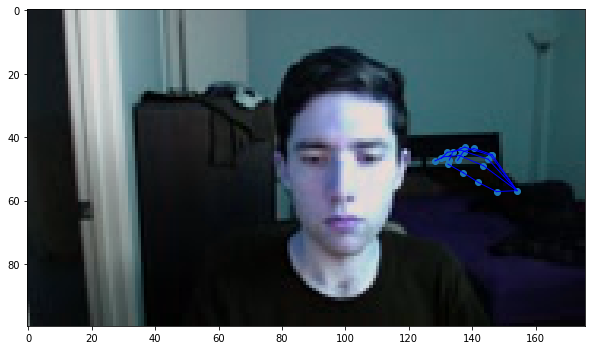

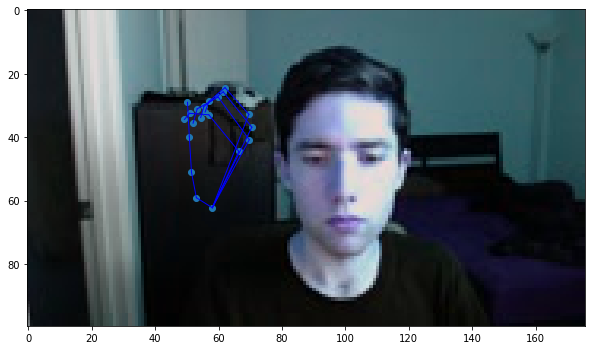

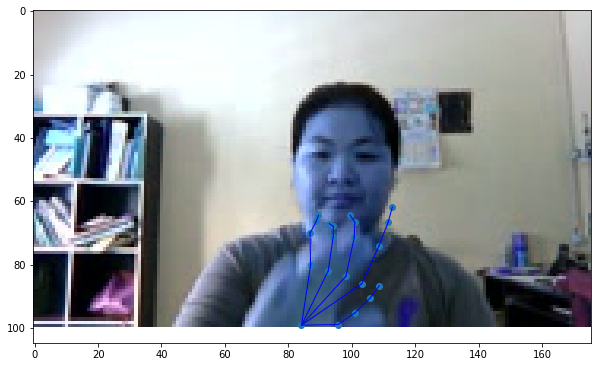

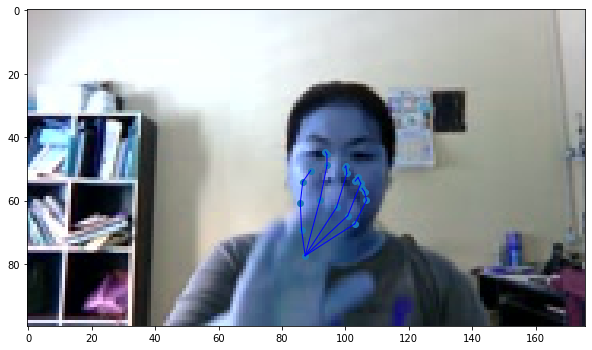

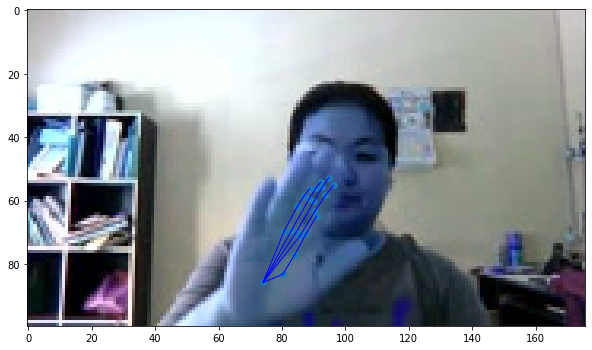

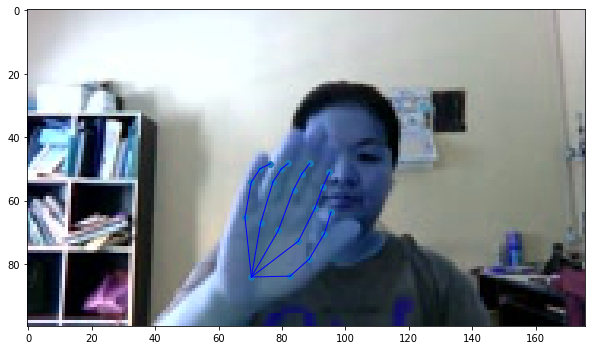

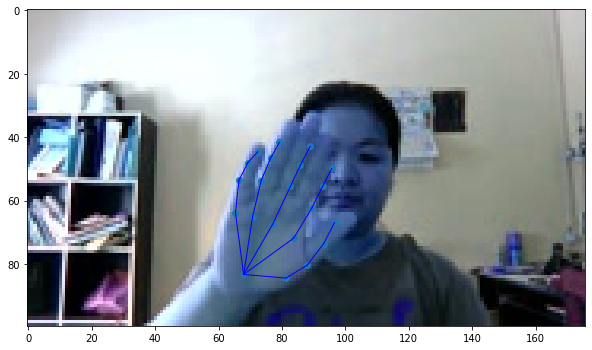

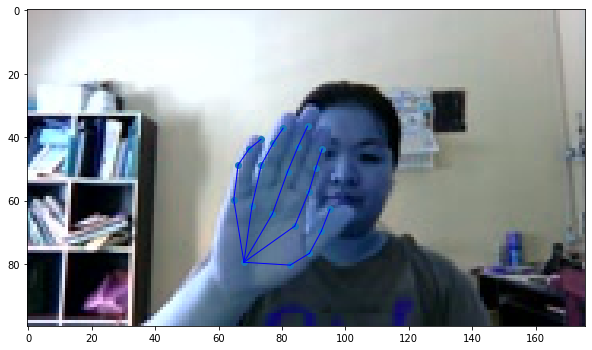

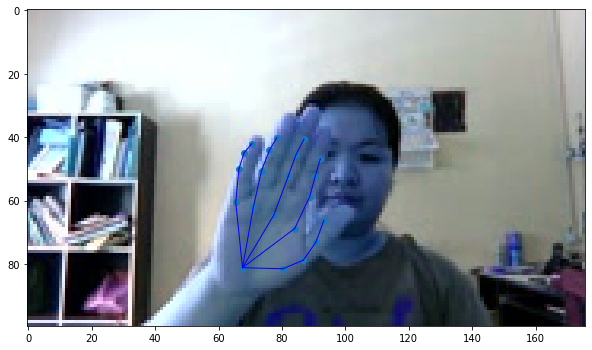

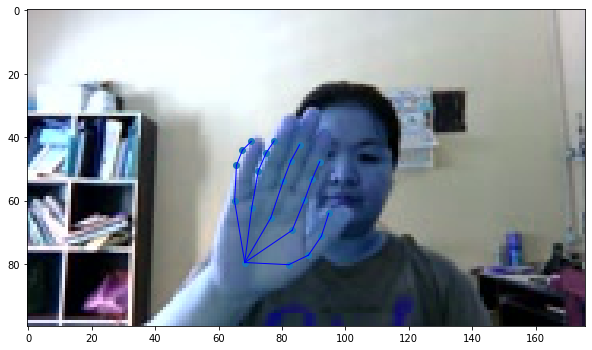

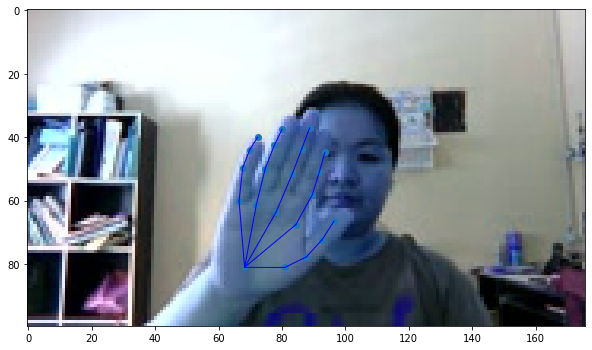

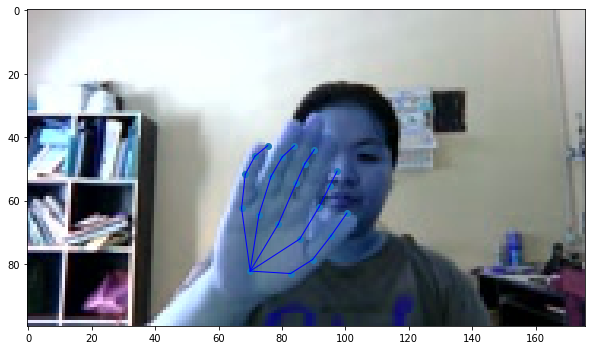

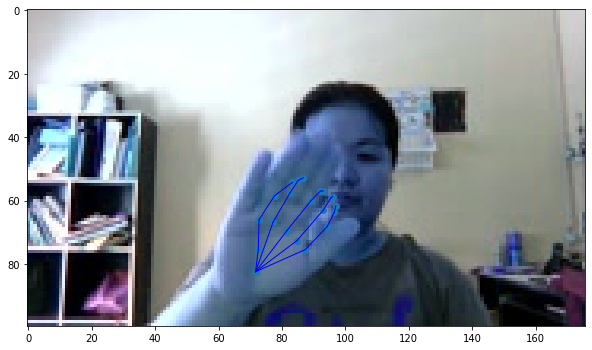

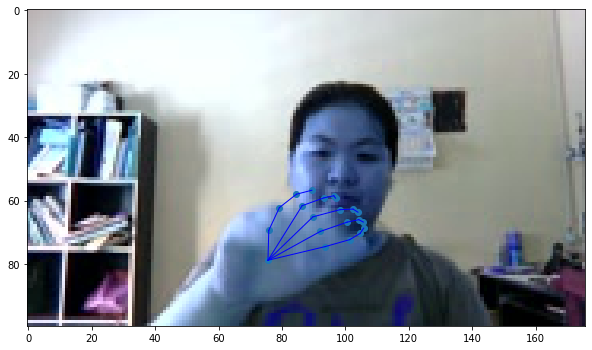

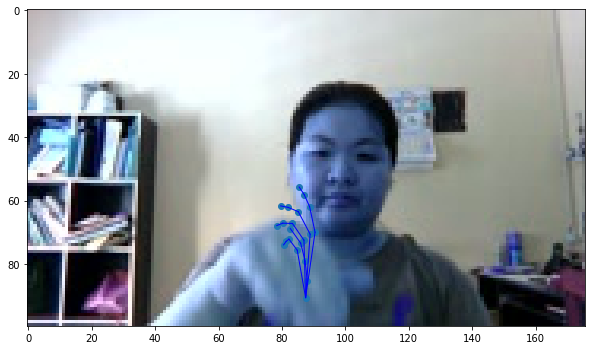

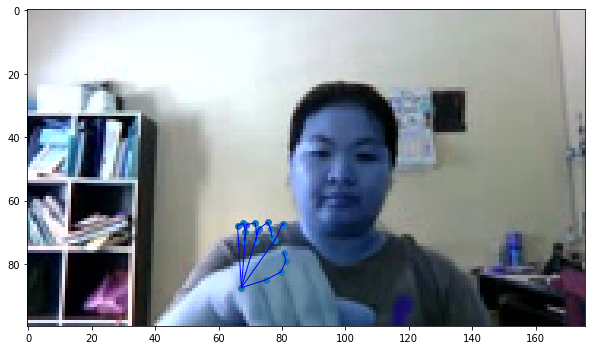

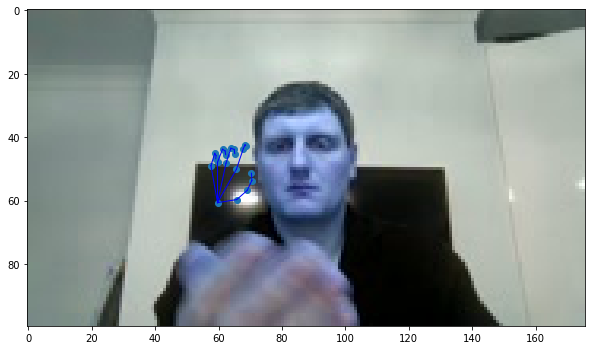

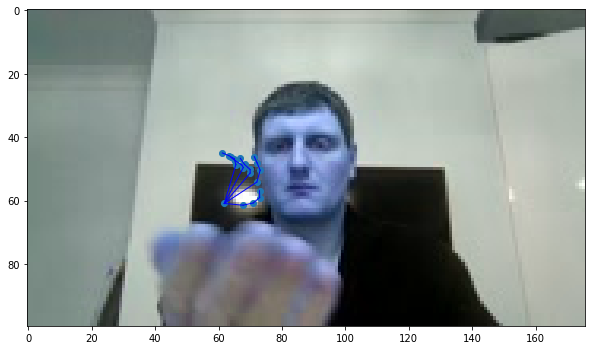

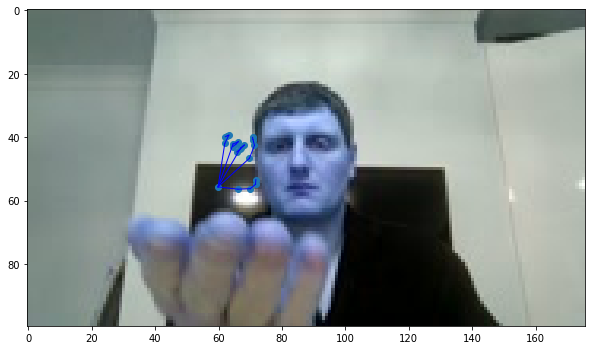

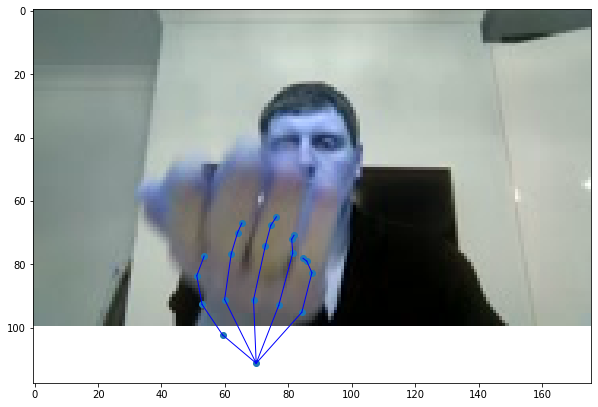

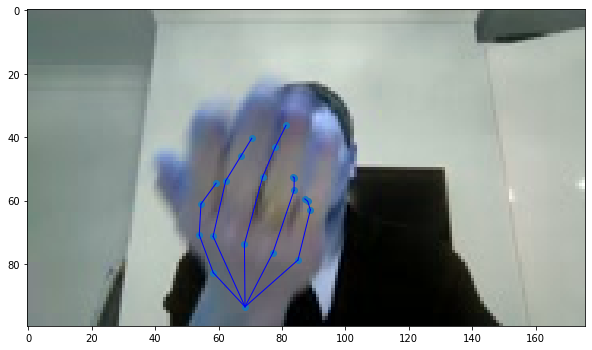

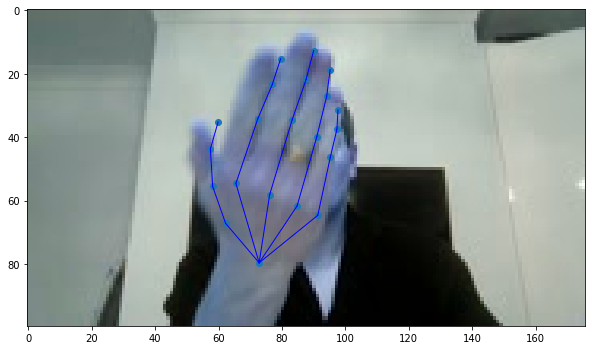

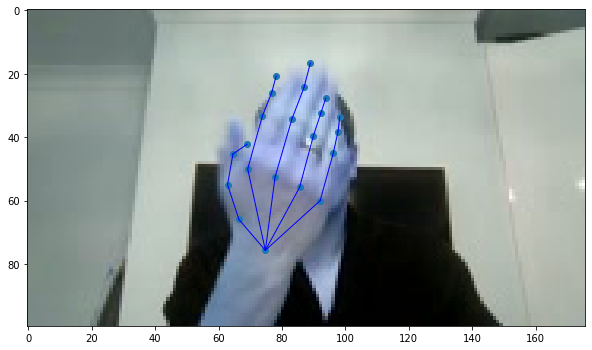

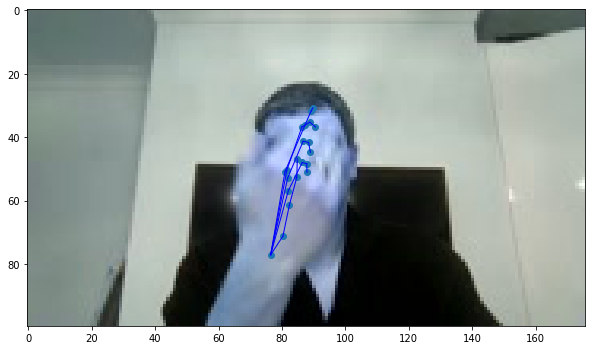

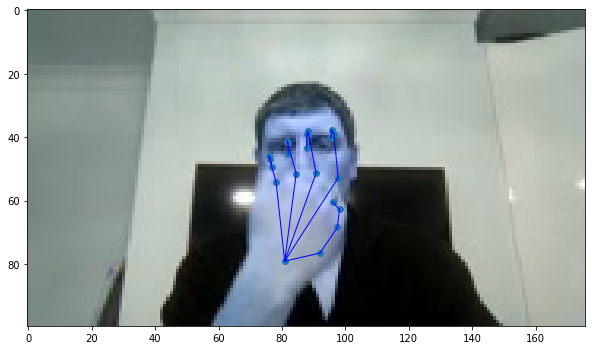

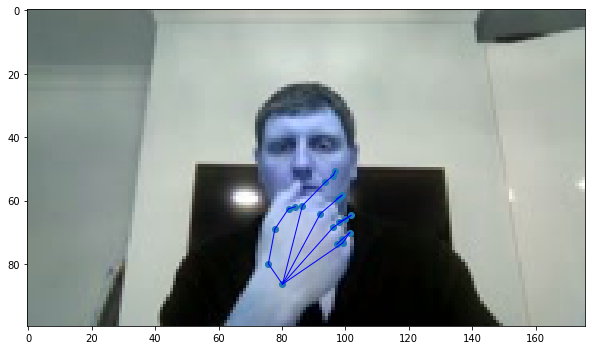

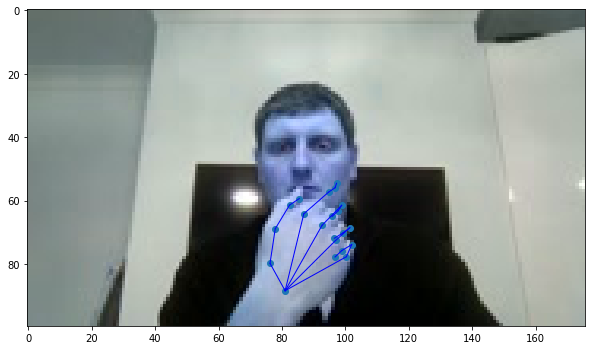

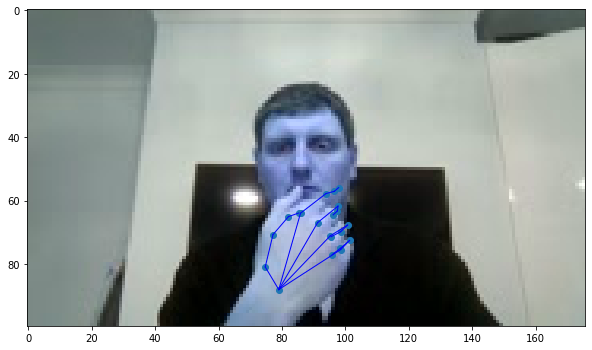

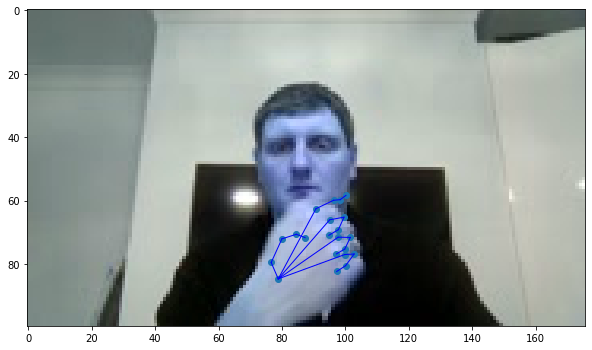

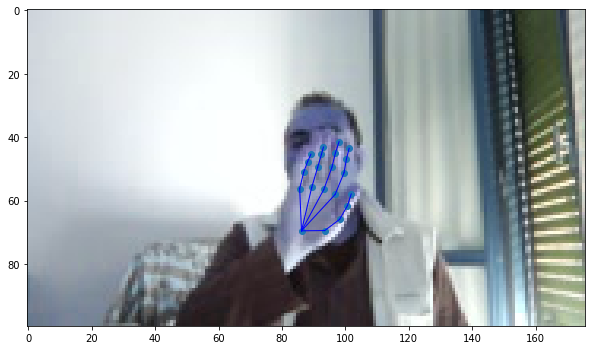

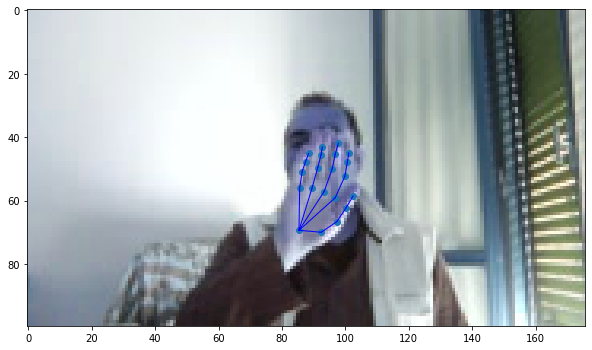

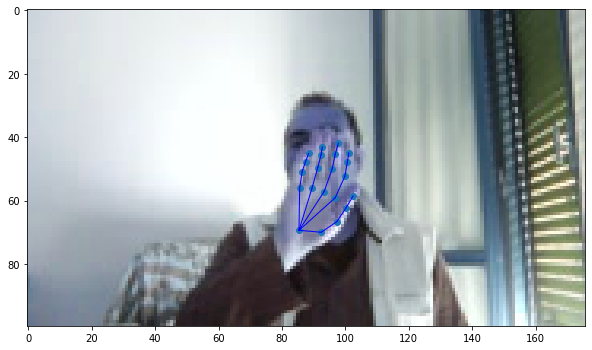

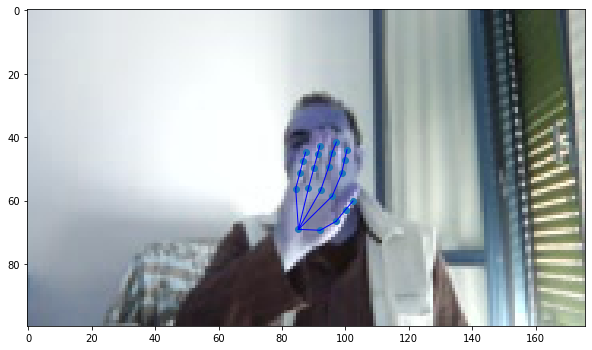

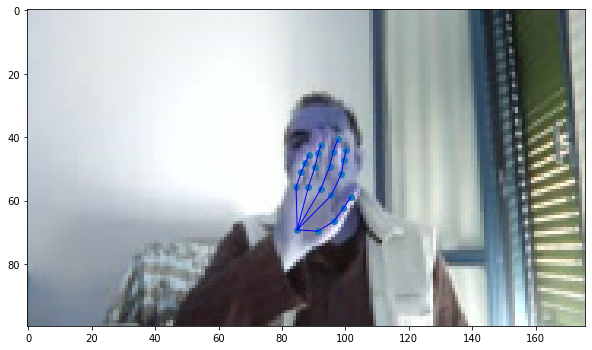

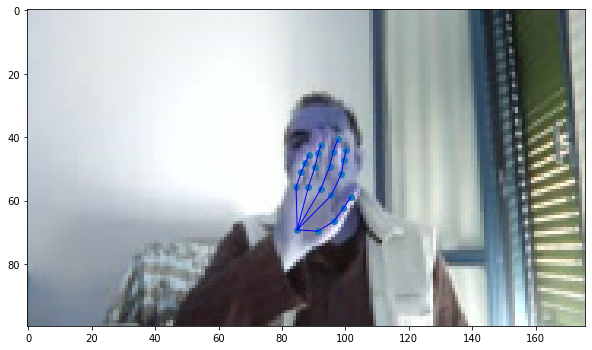

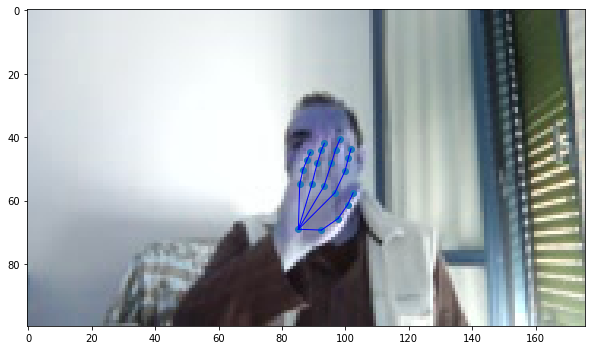

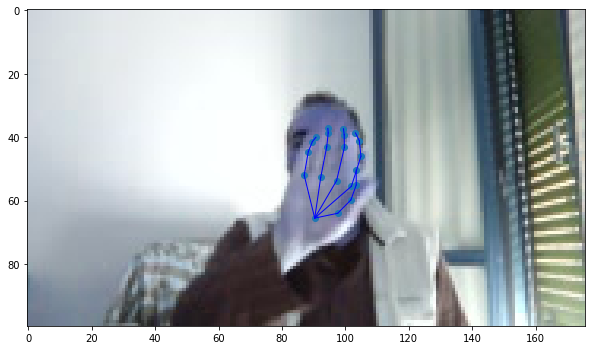

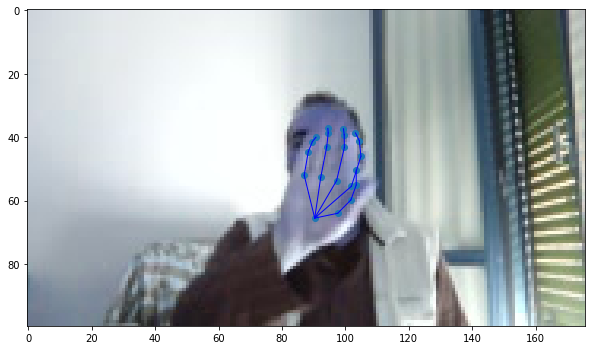

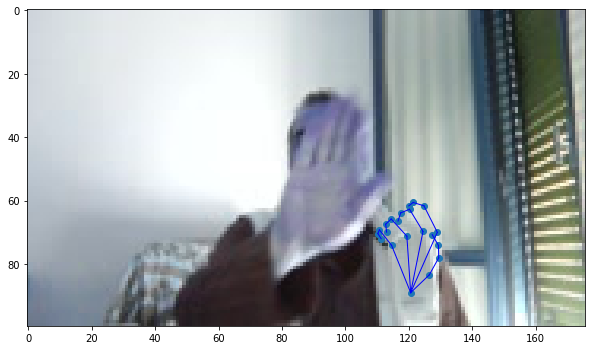

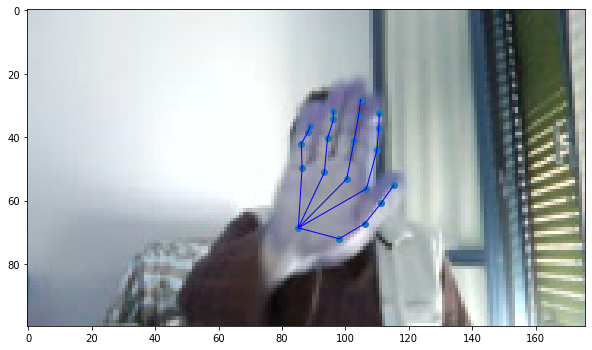

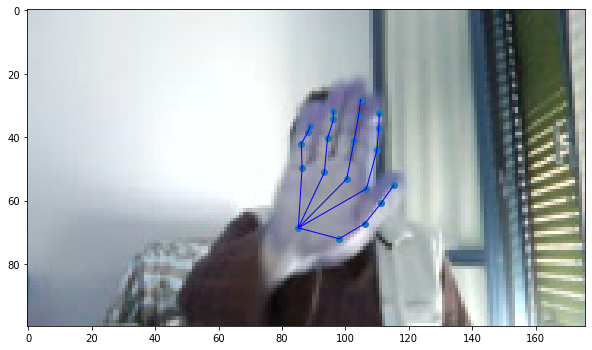

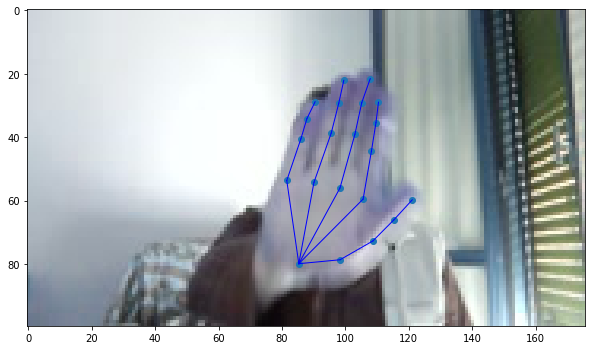

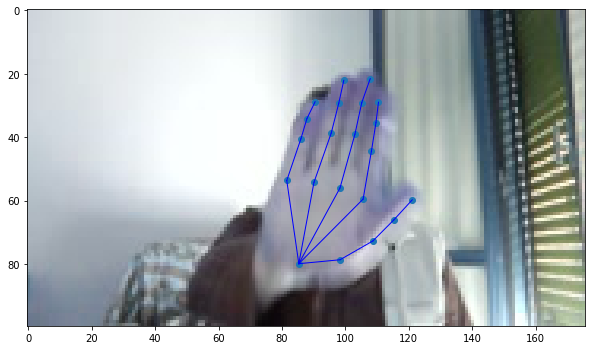

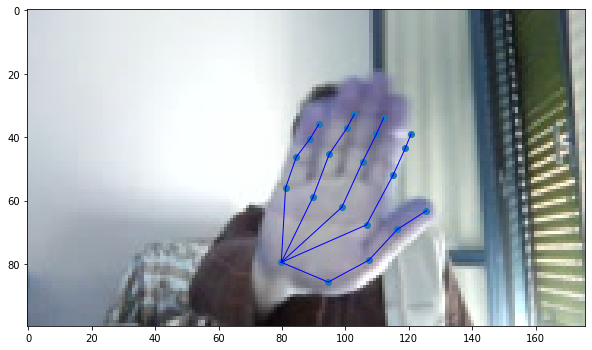

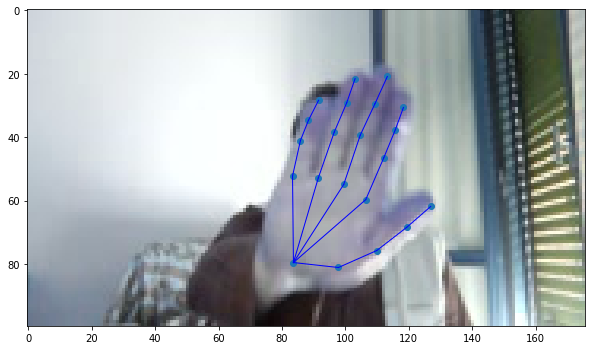

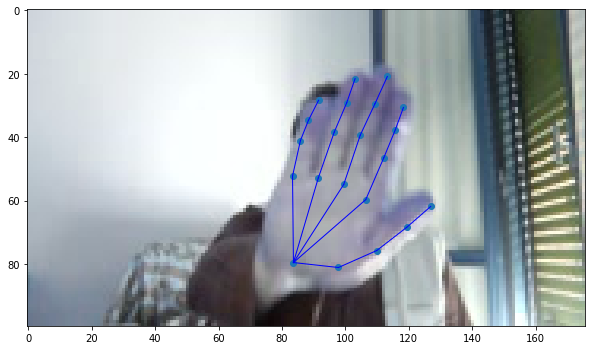

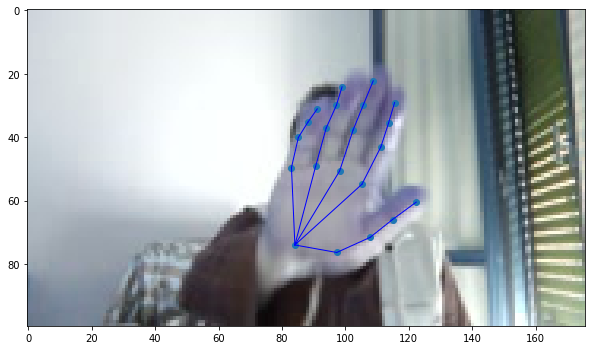

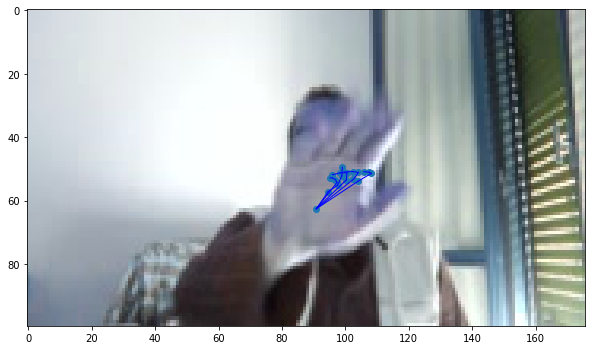

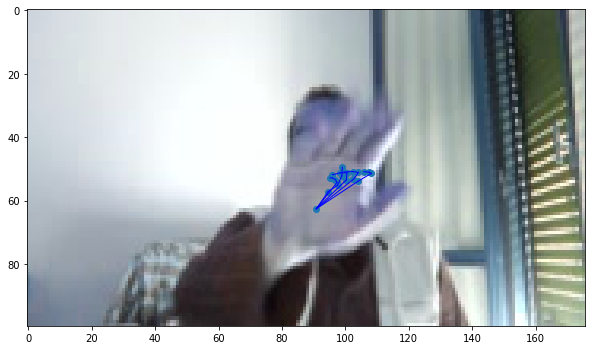

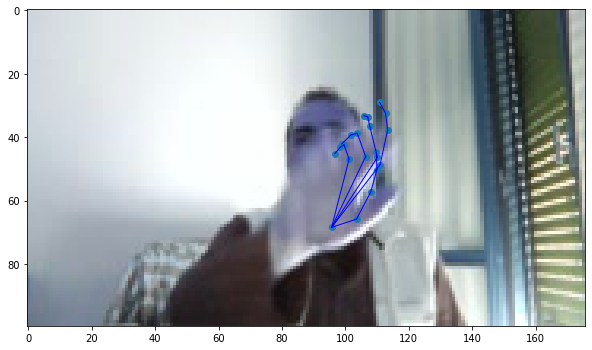

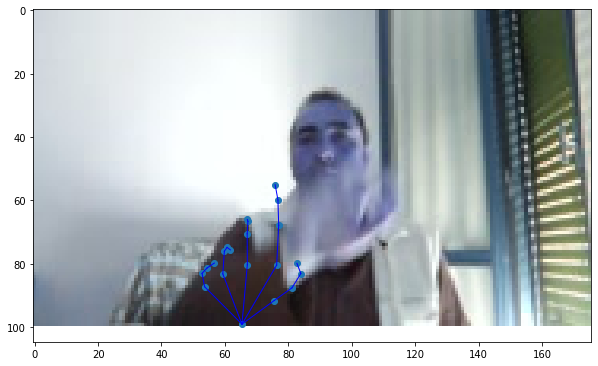

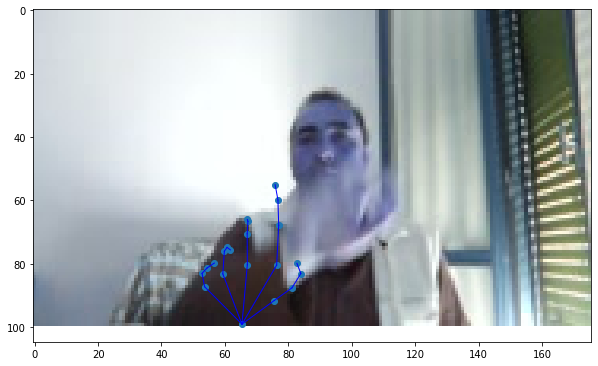

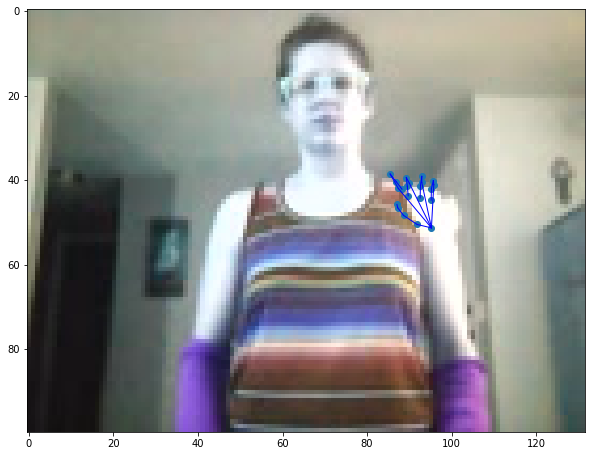

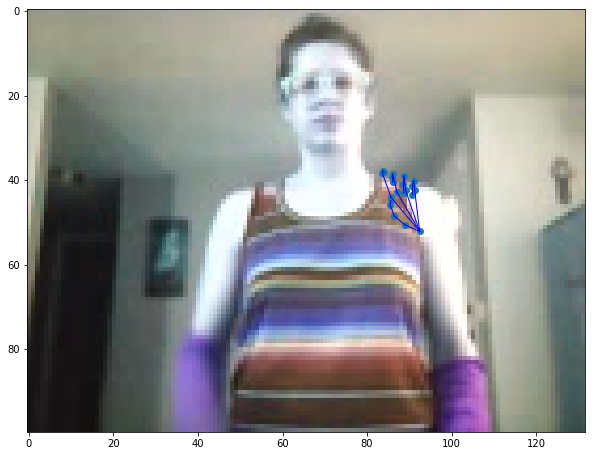

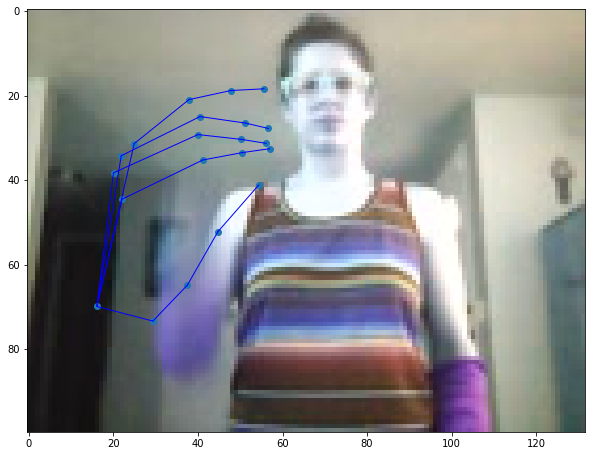

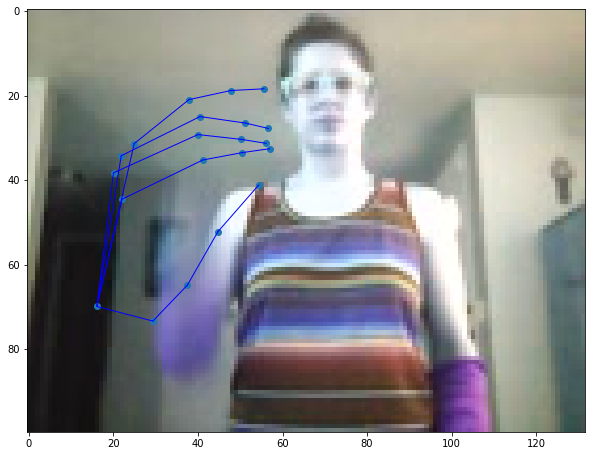

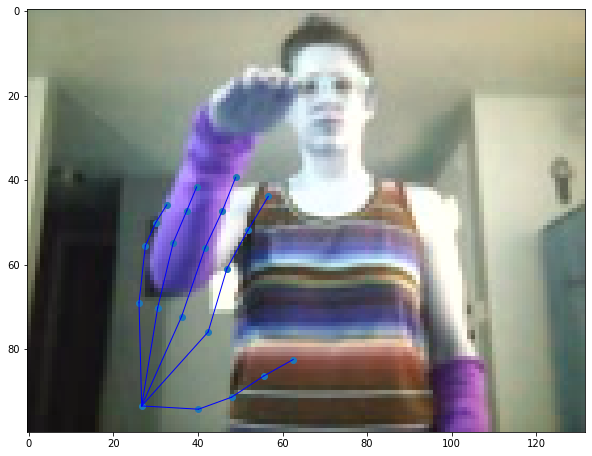

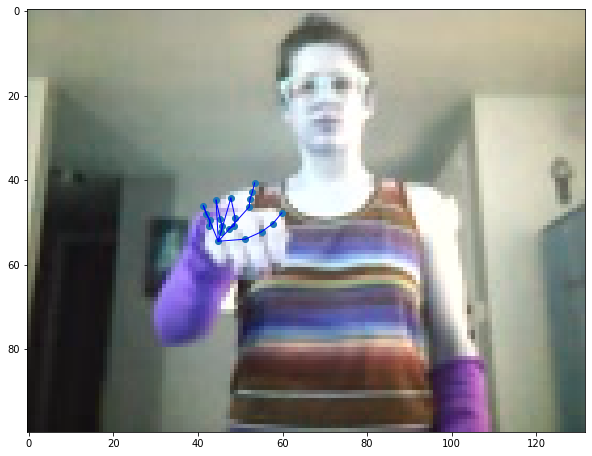

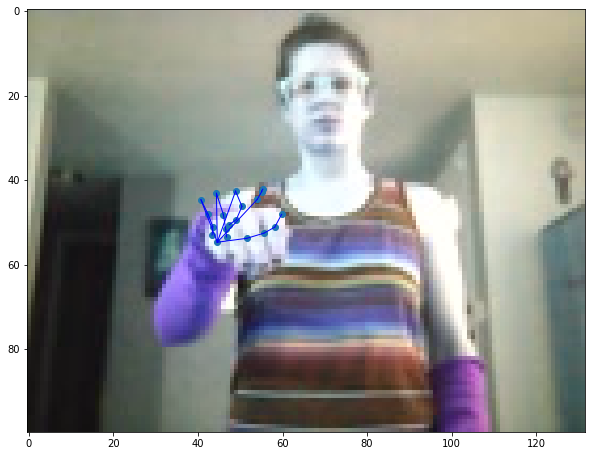

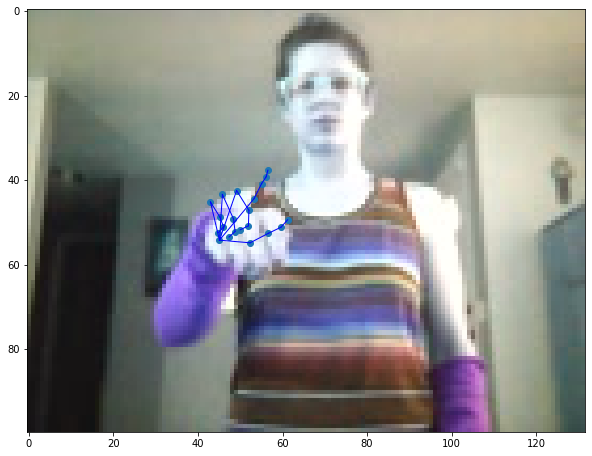

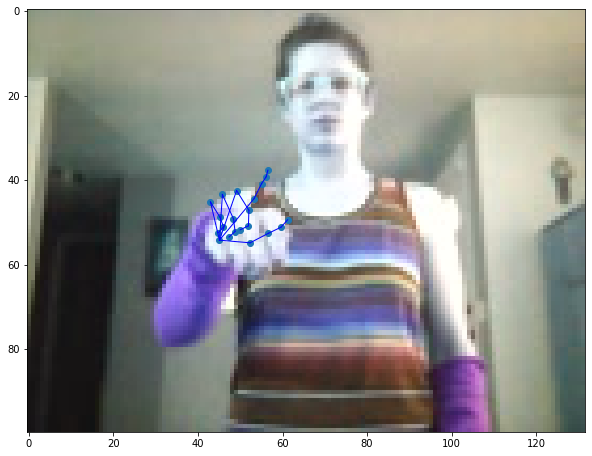

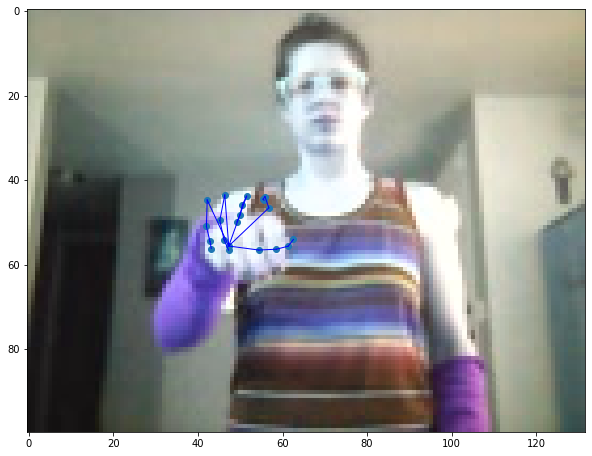

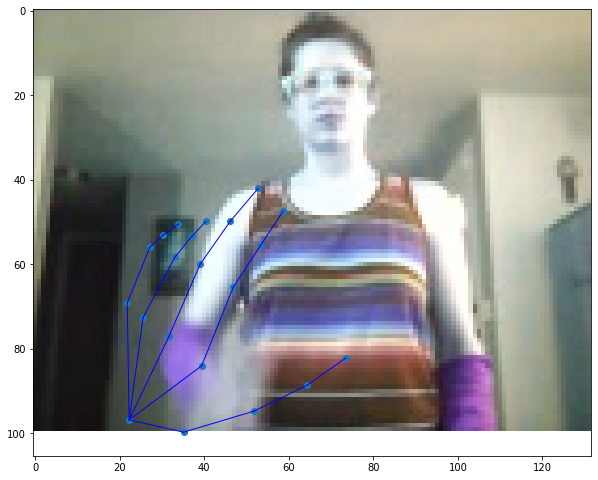

In [20]:
# 用现存数据渲染

import pickle
import pandas as pd

train_output_fn = 'C:\\Users\\zys98\\Desktop\\graduation\\github-repo\\sk_dd_2019\\codes\\data\\JESTER\\train.pkl'
Train = pickle.load(open(train_output_fn, "rb"))

root_dir = 'D:\\jester\\'
data_dir = 'D:\\jester\\data\\'
label_fn = 'jester-v1-labels.csv'
train_fn = 'jester-v1-train.csv'
test_fn = 'jester-v1-test.csv'
valid_fn = 'jester-v1-validation.csv'

train_data = pd.read_csv(root_dir + train_fn, sep=';')
train_dict = dict(zip(train_data.index, train_data.id))

video_dir = 'D:\\jester\\video\\'

for i in range(len(Train['label'])):
    if i > 30:
        break
    filelist = os.listdir('D:\\jester\\data\\' + str(train_dict[i]))
    frames = Train['pose'][i]
    frames = frames.reshape((-1,21,2))
    label = Train['label'][i]
    if label > 6:
        continue
    fname = video_dir+str(label)+'\\'+str(i)+'.avi'
    video = cv2.VideoWriter(filename=fname, fourcc=fourcc, fps=fps, frameSize=size)
    filecount = 0
    for frame in frames:
        img = cv2.imread('D:\\jester\\data\\' + str(train_dict[i]) + '\\' + filelist[filecount])
        filecount += 1
        if frame[0][0] == 0:
            pass
        else:
            kp = frame
            f,ax = plt.subplots(1,1, figsize=(10, 10))
            ax.imshow(img)
            ax.scatter(kp[:,0], kp[:,1])
            from matplotlib.lines import Line2D
            # 加线条
            for finger_index in range(5):
                start = finger_index * 4 + 1
                ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
                for k in range(start, start+3):
                    ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))
            f.canvas.draw()
            data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
            data = data.reshape(f.canvas.get_width_height()[::-1] + (3,)) 
            video.write(data)
    video.release()


In [21]:
train_dict[24]

118250